In [437]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Data



This dataset provides the customer information. It includes 2999 records and 21 fields.

In [438]:
data = pd.read_csv("marketing_dataset.csv",sep=";")
data.shape

(2999, 21)

In [439]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [440]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [441]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown'],
      dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [442]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [443]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown'], dtype=object)

### Data exploration

In [444]:
data['y'].value_counts()

no     2668
yes     331
Name: y, dtype: int64

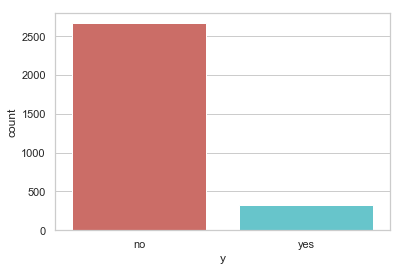

<Figure size 432x288 with 0 Axes>

In [445]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 2668 no's and 331 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [446]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.673538,216.016867,2.602699,984.110195,0.141304,0.216154,93.596114,-40.654273,3.769919,5174.121852
yes,41.628399,569.990937,1.915408,785.845921,0.601208,-1.025680,93.491360,-39.965257,2.282650,5097.293656


In [447]:
data.duration.mean()

255.08502834278093

In [498]:
data.age.mean()

39.88929643214405

Observations:

If the last contact duration is more the the average then there ia a possiblity that client is going to subscibe

The average age of customers who bought the term deposit is higher than that of the customers who didn't.

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.



We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [451]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,37.889637,258.606999,2.637954,946.857335,0.196501,0.027456,93.528838,-40.178197,3.554082,5163.408479
blue-collar,39.113354,260.465839,2.369565,983.571429,0.145963,0.214596,93.669674,-41.673137,3.708112,5172.864286
entrepreneur,42.553571,252.785714,2.089286,990.098214,0.125000,0.292857,93.641857,-40.556250,3.944223,5180.037500
housemaid,44.628571,211.900000,2.514286,970.571429,0.157143,0.247143,93.618729,-39.645714,3.794743,5171.755714
management,42.188841,253.596567,2.394850,960.613734,0.257511,-0.066953,93.480300,-40.776824,3.522150,5164.979828
retired,60.152542,324.025424,2.389831,906.254237,0.271186,-0.397458,93.547314,-39.427119,3.043788,5133.322881
self-employed,40.333333,254.254386,2.728070,972.798246,0.201754,0.130702,93.599614,-39.868421,3.709535,5166.128947
services,38.510204,222.714286,2.904762,982.102041,0.170068,0.088435,93.629150,-41.580272,3.573585,5166.929932
student,26.482759,309.758621,1.982759,913.620690,0.482759,-1.053448,93.564914,-39.596552,2.268741,5090.753448


In [313]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.906832,265.198758,2.506211,971.214286,0.198758,0.090994,93.603339,-40.922360,3.640276,5167.170497
married,42.141280,251.216336,2.529249,966.101545,0.171634,0.168874,93.603315,-40.405022,3.718663,5170.039404
single,33.213785,258.242991,2.544393,950.260514,0.233645,-0.114369,93.539329,-40.817056,3.353535,5155.706192
unknown,41.888889,371.777778,1.111111,999.000000,0.111111,-0.022222,93.436111,-40.422222,3.632111,5170.722222


In [314]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,41.772881,251.475706,2.412429,981.020339,0.142373,0.233898,93.660296,-41.299774,3.760316,5173.981808
high.school,37.730882,251.870588,2.588235,963.944118,0.200000,0.012794,93.576965,-41.123529,3.522172,5163.641324
professional.course,40.517060,277.892388,2.548556,962.477690,0.194226,0.196063,93.605073,-40.027034,3.734039,5168.189501
university.degree,38.854645,249.010929,2.597814,945.791257,0.221858,-0.054645,93.495904,-39.882186,3.490423,5160.233115
unknown,43.572464,271.376812,2.427536,941.543478,0.268116,-0.023188,93.667319,-39.400725,3.437239,5150.853623


Visualizations

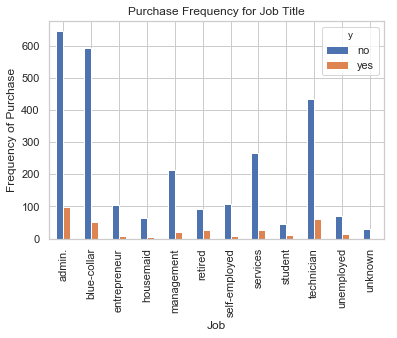

In [315]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Admin people are more likely to accept the subcription

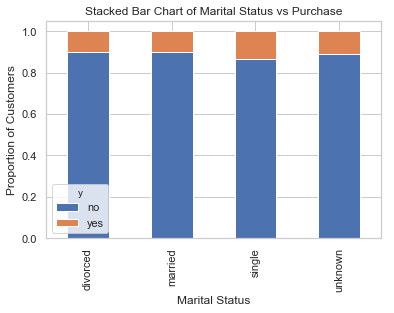

In [316]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

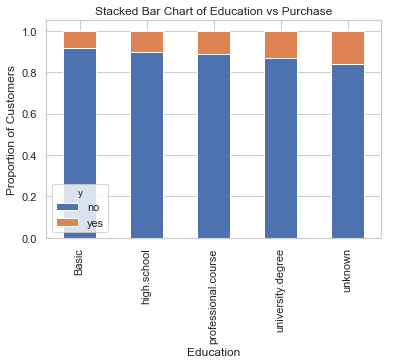

In [317]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

People whose educaton qualification is not known is more likely to subcribe
Education seems a good predictor of the outcome variable.

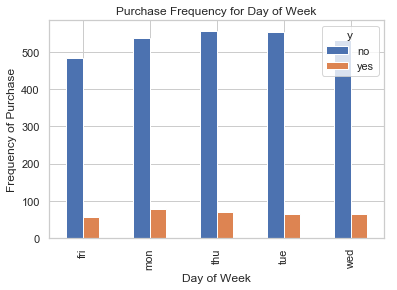

In [452]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

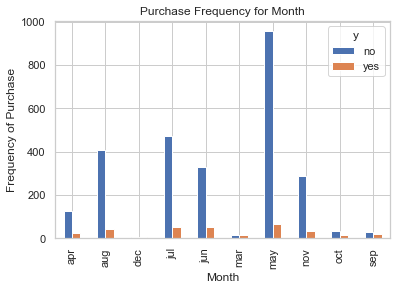

In [453]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

On May Month more people are subscibing
Month might be a good predictor of the outcome variable

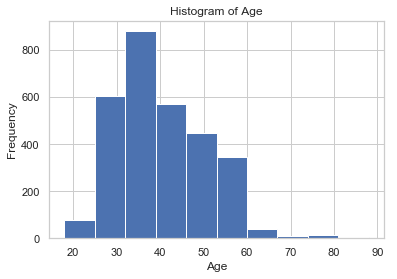

In [320]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

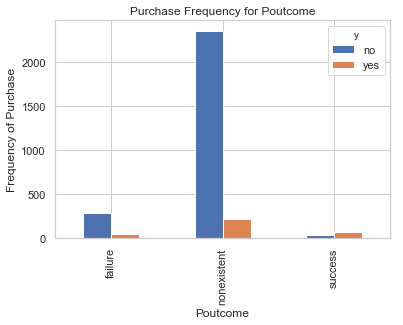

In [321]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [454]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [455]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,0,1,0,0,1,0,0,1,0,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,0,1,0,1,0,0,0,0,1,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,0,0,0,0,0,1,0,1,0,0
9,35,blue-collar,married,Basic,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0


In [456]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [457]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',


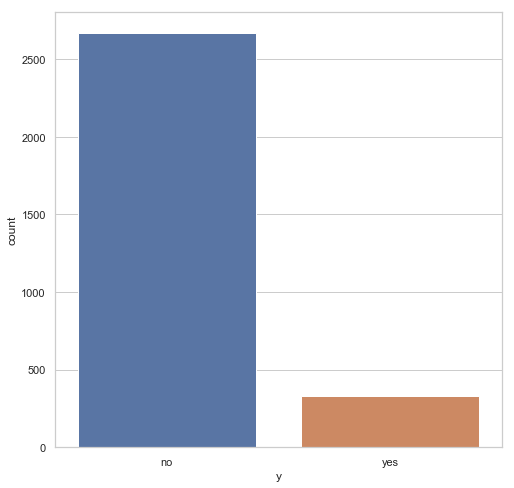

In [458]:
plt.figure(figsize=(8, 8))
sns.countplot('y', data=data_final)

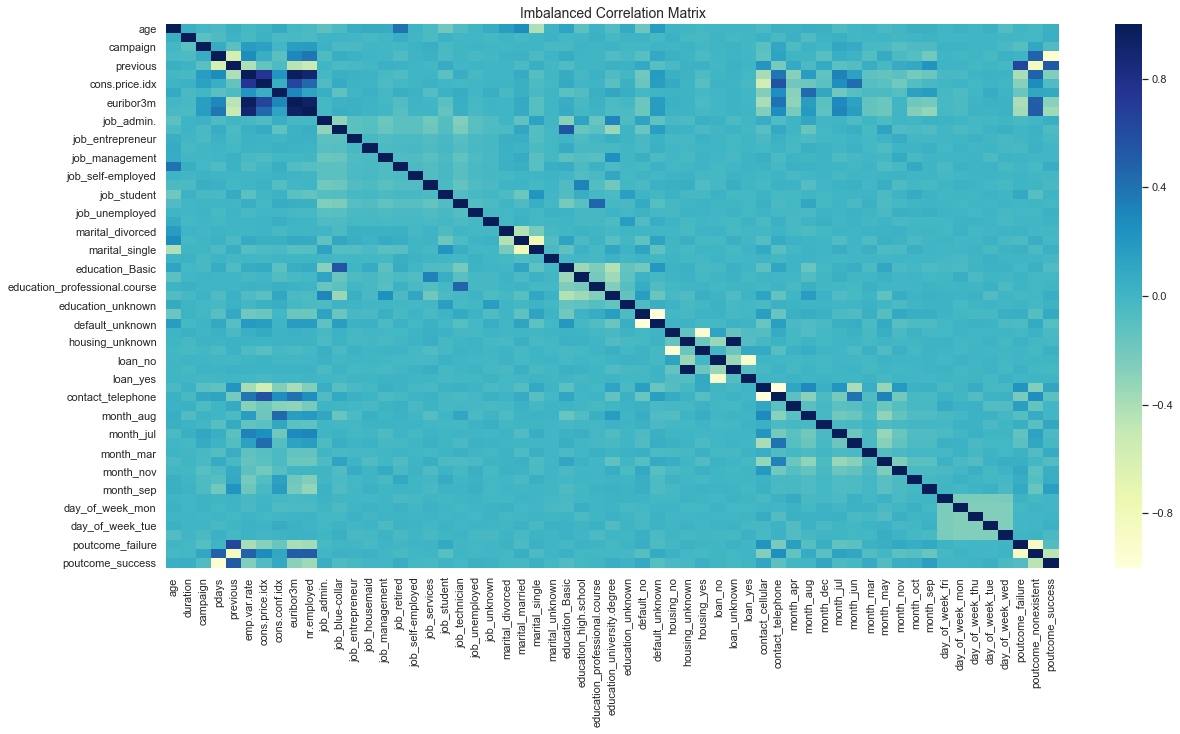

In [459]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = data_final.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [460]:
std_scale = preprocessing.StandardScaler().fit_transform(data_final.drop(columns='y'))

scaled_frame = pd.DataFrame(std_scale,columns=data_final.drop(columns='y').columns)

scaled_frame_y = pd.concat([scaled_frame,data_final.y],axis=1)

In [461]:
scaled_frame_y.y

0        no
1        no
2        no
3        no
4        no
5        no
6        no
7        no
8        no
9        no
10       no
11       no
12       no
13       no
14       no
15       no
16       no
17       no
18       no
19      yes
20       no
21      yes
22       no
23       no
24       no
25      yes
26       no
27       no
28       no
29       no
       ... 
2969     no
2970     no
2971     no
2972     no
2973     no
2974     no
2975     no
2976    yes
2977     no
2978    yes
2979     no
2980     no
2981     no
2982     no
2983     no
2984     no
2985     no
2986    yes
2987     no
2988     no
2989     no
2990     no
2991     no
2992     no
2993     no
2994     no
2995     no
2996     no
2997     no
2998     no
Name: y, Length: 2999, dtype: object

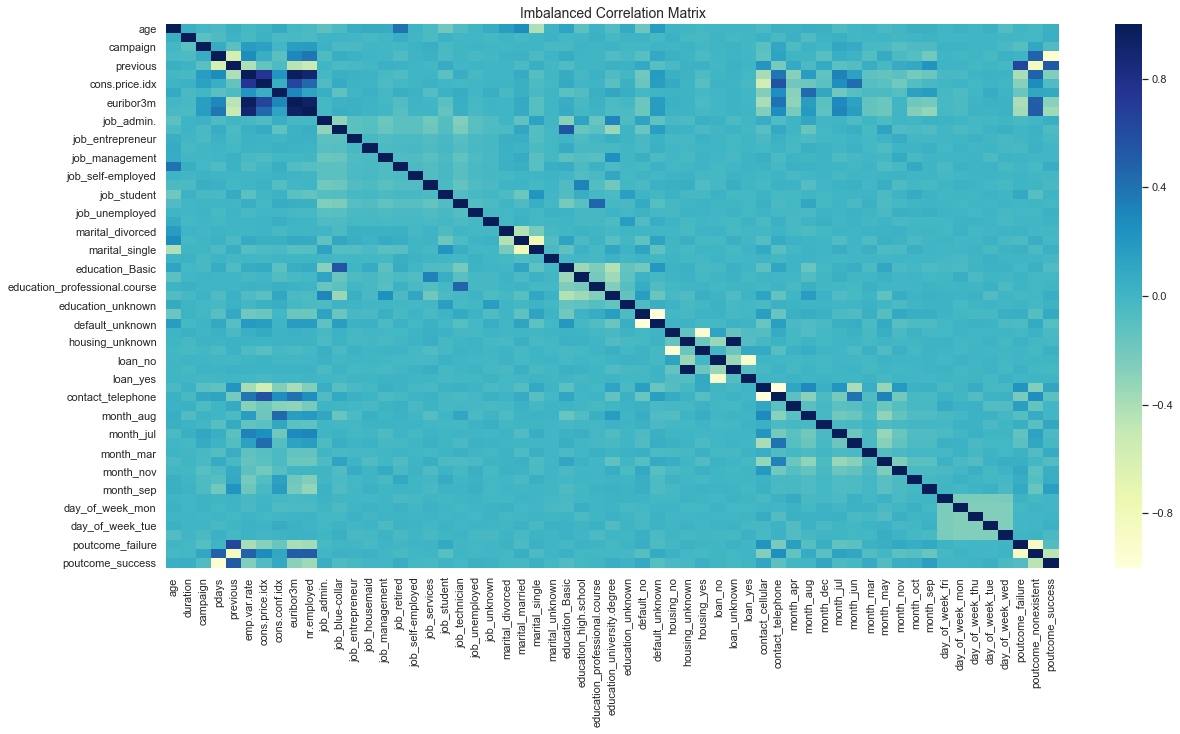

In [462]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = scaled_frame_y.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [463]:
scaled_frame_y['y'].value_counts()

no     2668
yes     331
Name: y, dtype: int64

In [464]:
# Shuffle the Dataset.
shuffled_df = scaled_frame_y.sample(frac=1,random_state=4)

# amount of answered classes 331 rows.
answered_df = shuffled_df.loc[scaled_frame_y['y'] == 'yes']

#Randomly select 331 non answered observations.
non_answered_df = shuffled_df.loc[scaled_frame_y['y'] == 'no'].sample(n=331,random_state=42)
normalized_df = pd.concat([answered_df, non_answered_df])

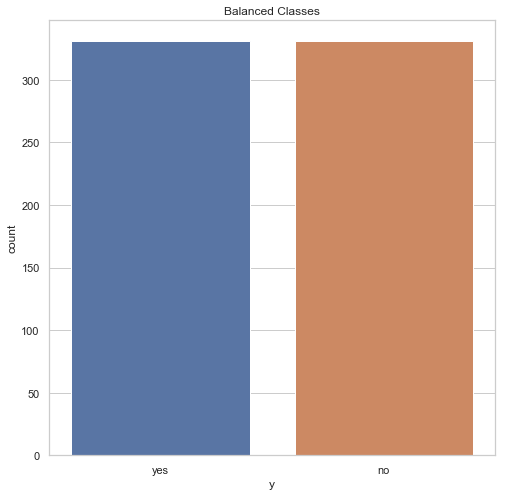

In [465]:

plt.figure(figsize=(8, 8))
sns.countplot('y', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

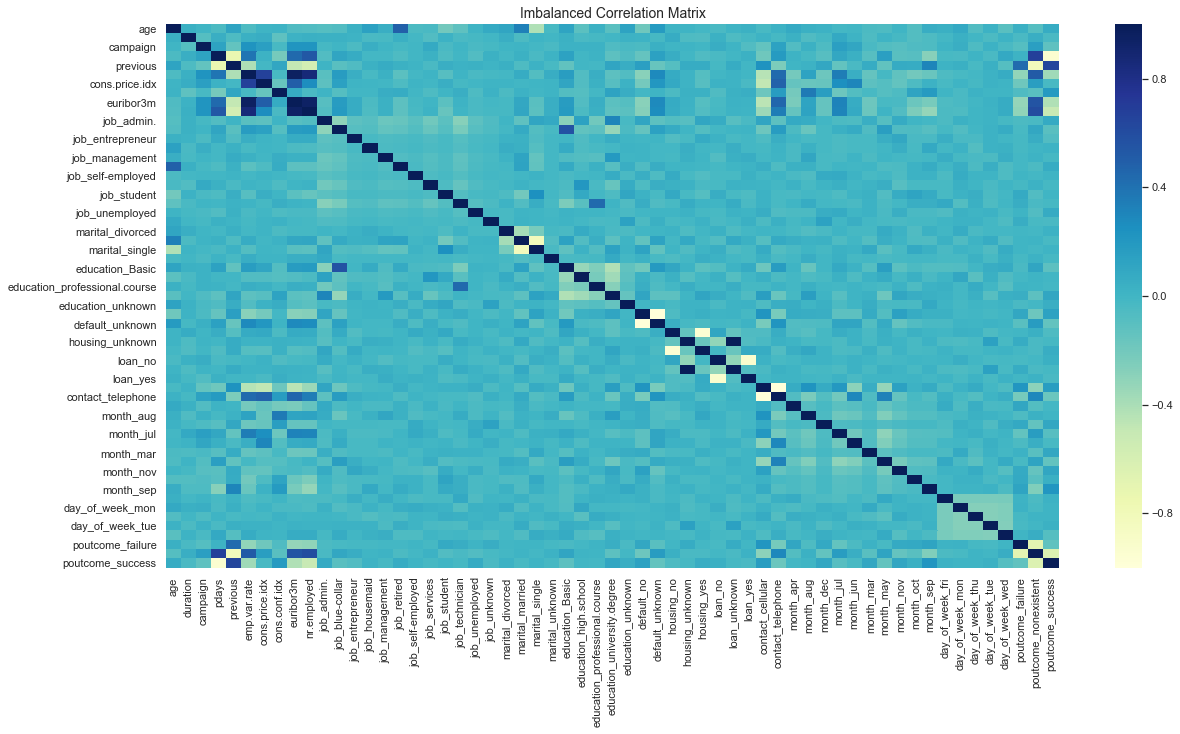

In [466]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

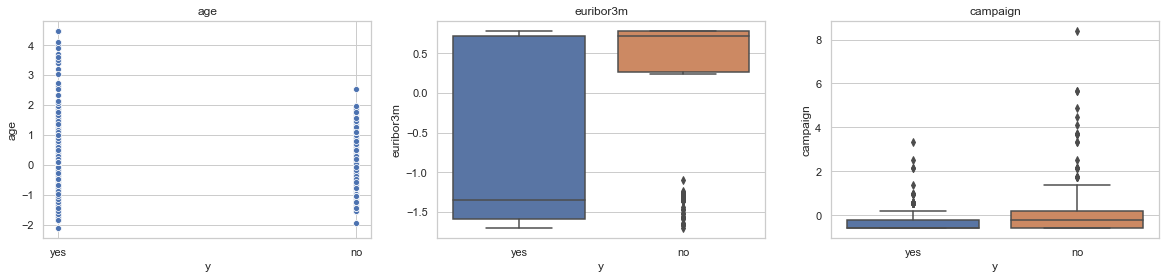

In [467]:
fig, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.scatterplot(x="y", y="age", data=normalized_df, ax=axes[0])
axes[0].set_title('age')

sns.boxplot(x="y", y="euribor3m", data=normalized_df, ax=axes[1])
axes[1].set_title('euribor3m')


sns.boxplot(x="y", y="campaign", data=normalized_df, ax=axes[2])
axes[2].set_title('campaign')


plt.show()

In [468]:
normalized_df.loc[normalized_df['y']=='yes','y']=1
normalized_df.loc[normalized_df['y']=='no','y']=0


In [469]:
normalized_df.y.value_counts()

1    331
0    331
Name: y, dtype: int64

### Feature Selection

In [470]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [471]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 15)
rfe = rfe.fit(normalized_df[X], normalized_df[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True  True False  True False False
 False False False False False False False  True  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False  True False  True]
[ 1  1  1  1 39  1  1  1 21  1 38 23  7  4 16 12  9 22 17  1  1  2 32 42
 45 30  1  3 26 25 10 18 31 15 37 33  5 28 27 24 11 36 14 40 20 35  8  1
  1 13 19 41 44 43 34  6  1 29  1]


In [472]:
rfe.ranking_

array([ 1,  1,  1,  1, 39,  1,  1,  1, 21,  1, 38, 23,  7,  4, 16, 12,  9,
       22, 17,  1,  1,  2, 32, 42, 45, 30,  1,  3, 26, 25, 10, 18, 31, 15,
       37, 33,  5, 28, 27, 24, 11, 36, 14, 40, 20, 35,  8,  1,  1, 13, 19,
       41, 44, 43, 34,  6,  1, 29,  1])

In [473]:
normalized_df[X].columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week

In [474]:
sorted_importance = [x for _,x in sorted(zip(rfe.ranking_,normalized_df[X].columns))]

In [475]:
sorted_importance

['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'education_Basic',
 'emp.var.rate',
 'job_technician',
 'job_unemployed',
 'month_may',
 'month_nov',
 'nr.employed',
 'pdays',
 'poutcome_failure',
 'poutcome_success',
 'job_unknown',
 'education_high.school',
 'job_housemaid',
 'loan_no',
 'day_of_week_wed',
 'job_entrepreneur',
 'month_mar',
 'job_self-employed',
 'education_unknown',
 'contact_telephone',
 'job_retired',
 'month_oct',
 'month_aug',
 'housing_no',
 'job_management',
 'job_student',
 'default_no',
 'month_sep',
 'month_jul',
 'euribor3m',
 'job_services',
 'job_blue-collar',
 'contact_cellular',
 'education_university.degree',
 'education_professional.course',
 'loan_yes',
 'loan_unknown',
 'poutcome_nonexistent',
 'marital_unknown',
 'default_unknown',
 'marital_divorced',
 'housing_yes',
 'day_of_week_tue',
 'month_jun',
 'month_apr',
 'housing_unknown',
 'job_admin.',
 'previous',
 'month_dec',
 'day_of_week_fri',
 'marital_married',
 'day_of

In [476]:
(rfe.ranking_ == 1).sum()

15

In [477]:
important_columns = sorted_importance[:15]

In [478]:
important_columns

['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'education_Basic',
 'emp.var.rate',
 'job_technician',
 'job_unemployed',
 'month_may',
 'month_nov',
 'nr.employed',
 'pdays',
 'poutcome_failure',
 'poutcome_success']

The Recursive Feature Elimination (RFE) has helped us select the following features: 'age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'education_Basic',
 'emp.var.rate',
 'job_technician',
 'job_unemployed',
 'month_may',
 'month_nov',
 'nr.employed',
 'pdays',
 'poutcome_failure',
 'poutcome_success'.

In [479]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=normalized_df[important_columns]
y=normalized_df['y']

### Implementing the model

### Logistic Regression Model Fitting

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [481]:
y_pred = logreg.predict(X_test)

In [482]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [483]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.877


### Confusion Matrix

In [484]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[68  4]
 [ 9 52]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [485]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.90


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [486]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        72
           1       0.93      0.85      0.89        61

    accuracy                           0.90       133
   macro avg       0.91      0.90      0.90       133
weighted avg       0.90      0.90      0.90       133



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

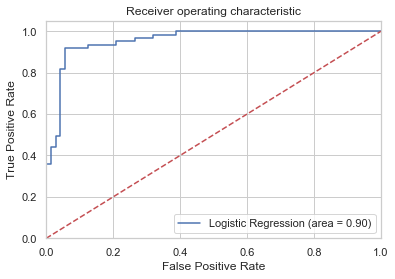

In [487]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
normalized_df.drop(columns='y')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2845,-0.281046,0.729501,-0.597223,0.196047,-0.348025,-1.205423,-1.190146,-1.223862,-1.357858,-0.894720,...,-0.132835,-0.130211,-0.468087,1.966852,-0.514652,-0.509984,-0.498541,-0.352226,0.410231,-0.186686
2136,-0.086503,0.971478,0.576225,0.196047,-0.348025,0.654904,0.704650,0.909601,0.718798,0.340956,...,-0.132835,-0.130211,-0.468087,-0.508427,-0.514652,1.960844,-0.498541,-0.352226,0.410231,-0.186686
2515,-1.545574,3.492719,0.185075,0.196047,-0.348025,0.847351,0.573856,-0.461911,0.777441,0.839798,...,-0.132835,-0.130211,-0.468087,-0.508427,1.943059,-0.509984,-0.498541,-0.352226,0.410231,-0.186686
2862,1.761653,0.132365,-0.597223,-5.114011,6.900082,-1.205423,0.501575,0.125880,-1.680395,-2.110227,...,-0.132835,-0.130211,-0.468087,-0.508427,1.943059,-0.509984,-0.498541,-0.352226,-2.437648,5.356591
2523,0.983482,1.478848,-0.597223,0.196047,-0.348025,-1.205423,0.283010,1.301462,-1.702817,-2.110227,...,-0.132835,-0.130211,2.136354,-0.508427,-0.514652,-0.509984,-0.498541,-0.352226,0.410231,-0.186686
2412,-0.183775,2.876069,-0.597223,0.196047,-0.348025,0.847351,1.515230,-0.265981,0.723398,0.839798,...,-0.132835,-0.130211,-0.468087,-0.508427,-0.514652,1.960844,-0.498541,-0.352226,0.410231,-0.186686
2830,-0.961946,1.076855,-0.597223,0.196047,1.464002,-0.114887,-0.661806,-0.309521,0.270351,0.405497,...,-0.132835,-0.130211,-0.468087,-0.508427,1.943059,-0.509984,-0.498541,2.839088,-2.437648,-0.186686
1371,-0.086503,1.927676,-0.206074,0.196047,-0.348025,-0.114887,-0.661806,-0.309521,0.238730,0.405497,...,-0.132835,-0.130211,2.136354,-0.508427,-0.514652,-0.509984,-0.498541,-0.352226,0.410231,-0.186686
968,1.080754,1.553002,-0.597223,0.196047,-0.348025,0.654904,0.704650,0.909601,0.718223,0.340956,...,-0.132835,-0.130211,2.136354,-0.508427,-0.514652,-0.509984,-0.498541,-0.352226,0.410231,-0.186686
2616,-0.572860,-0.335977,-0.597223,-5.092685,3.276028,-2.231810,-1.610065,2.281113,-1.662572,-1.991904,...,-0.132835,-0.130211,-0.468087,-0.508427,1.943059,-0.509984,-0.498541,-0.352226,-2.437648,5.356591


In [490]:
RandomForest = RandomForestClassifier(n_jobs = -1)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [491]:
numOfestimators = [1,5,10,11,12,13,15,20,25,30]
numOfleafs = [1, 3, 5,6,7, 10, 25]
numOffeatures = np.arange(0.1, 1.1, 0.1)
best_result = []
for NumOfEstimator in numOfestimators:
    for NumOfLeaf in numOfleafs:
        for NumOfFeature in numOffeatures:
            result = [NumOfEstimator, NumOfLeaf, NumOfFeature]
            m = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=NumOfEstimator, 
                                       min_samples_leaf=NumOfLeaf, 
                                       max_features=NumOfFeature)
            m.fit(X_train, y_train)
            result.append(m.score(X_train, y_train))
            result.append(m.score(X_test, y_test))
            if len(best_result) == 0:
                best_result = result
            elif best_result[4] < result[4]:
                print(result)
                best_result = result
print("The best result is", best_result)

[1, 1, 0.2, 0.9376181474480151, 0.8120300751879699]
[1, 1, 0.30000000000000004, 0.9357277882797732, 0.8646616541353384]
[1, 1, 0.4, 0.9243856332703214, 0.8721804511278195]
[1, 5, 0.4, 0.8771266540642723, 0.8872180451127819]
[1, 7, 0.6, 0.8865784499054821, 0.9172932330827067]
[13, 10, 0.2, 0.9017013232514177, 0.924812030075188]
The best result is [13, 10, 0.2, 0.9017013232514177, 0.924812030075188]


In [512]:
RandomForest_best_result = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=13, 
                                       min_samples_leaf=10, 
                                       max_features=0.2)
RandomForest_best_result.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [513]:
print(RandomForest_best_result.score(X_train, y_train))
print(RandomForest_best_result.score(X_test, y_test))

0.9035916824196597
0.9172932330827067


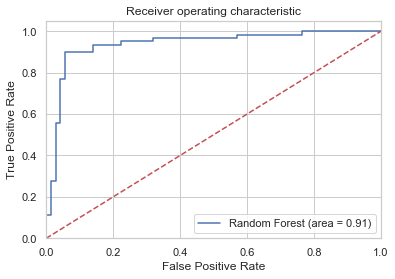

In [514]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RandomForest_best_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RandomForest_best_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [515]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
abc = GradientBoostingClassifier(n_estimators=22)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [516]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9035916824196597
0.9022556390977443


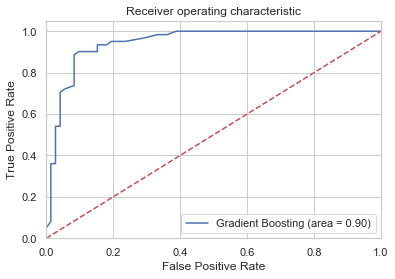

In [517]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()